# Generation of brain activity data with `PottsModel`
The class `PottsModel` in `simulate.py` implements a generative model of brain activity data. It generates a group of subjects with slightly different arrangements of functional regions - and then makes some functional data. This data set can serve as a sandbox for brain parcellation and brain connectivity estimation algorithms. For mathematical details, see the `README.md` document. 

## Generate the model and the group-parcellation

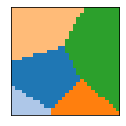

In [1]:
# Import the Pottsmodel Class 
from simulate import PottsModel
import numpy as np
import matplotlib.pyplot as plt 
# Generate a Pottsmodel on a rectangular 30x30 Grid
M = PottsModel(5,30,30)
# Define the parcellation + Prior Probability  
M.define_mu(200)
# Show the clustering 
plt.figure(figsize=(2,2))
cluster = np.argmax(M.mu,axis=0)
M.plot_maps(cluster)

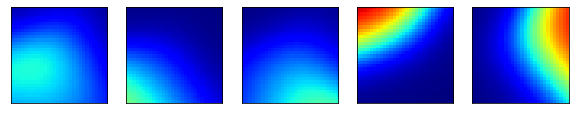

In [2]:
# Show the prior probabilities for the different parcels 
plt.figure(figsize=(10,2))
M.plot_maps(M.mu,cmap='jet',vmax=1,grid=[1,5])

## Gibbs sampling from Prior
Hint: Try the influence of changing the temperature parameter  

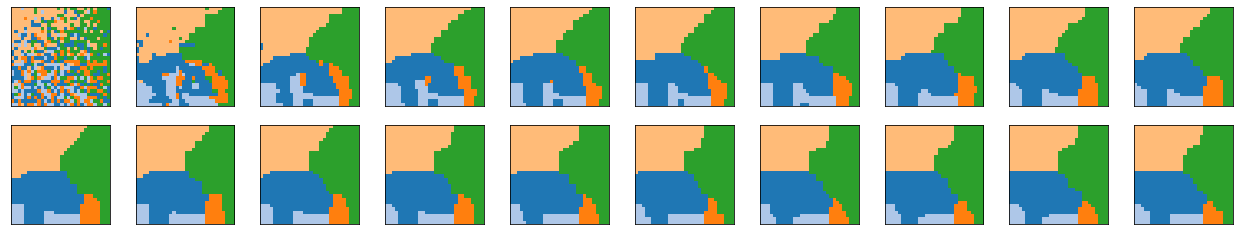

In [6]:
# Demostrate a single Gibbs sample, starting from a random start (drawn indpendentlu from mu) 
M.theta_w = 5 # inverse temperature parameter
Us = M.sample_gibbs(prior=True,iter=19)
plt.figure(figsize=(22,4))
M.plot_maps(Us,cmap='tab20',grid=[2,10])

## Sample individual Subjects from the Prior probability distribution 
Now we can get a number of Subjects from the prior distribution 

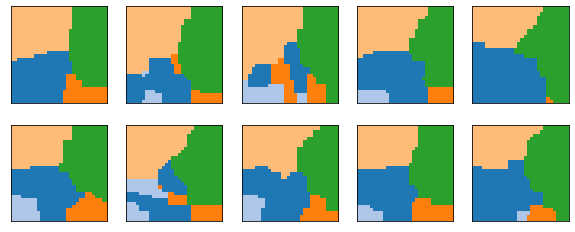

In [9]:
num_subj = 10 
U = np.zeros((num_subj,M.P))
for i in range(num_subj):
    Us = M.sample_gibbs(prior=True,iter=10)
    U[i,:]=Us[-1,:]
plt.figure(figsize=(10,4))
M.plot_maps(U,cmap='tab20',grid=[2,5])

## Generate a data set for a specific experiment
We can now generate a data set for  